# 📚 GIẢI THÍCH CÁC THUẬT TOÁN TIỀN XỬ LÝ

## 🎯 Tổng Quan

Notebook này sử dụng các **thuật toán và kỹ thuật tiền xử lý dữ liệu** sau:

### 🧹 CÁC KỸ THUẬT XỬ LÝ DỮ LIỆU

| Kỹ Thuật | Mục Đích | Phương Pháp |
|----------|----------|-------------|
| **Remove Duplicates** | Loại bỏ dữ liệu trùng lặp | So sánh toàn bộ columns |
| **Handle Missing Values** | Xử lý giá trị thiếu | Imputation (điền giá trị) |
| **Outlier Detection** | Phát hiện giá trị bất thường | **IQR Method** |
| **Label Encoding** | Chuyển categorical → số | Gán số nguyên 0,1,2,... |

### 📊 THUẬT TOÁN CHÍNH: IQR (Interquartile Range)

**Công thức loại bỏ outliers:**

```
Q1 = Percentile thứ 25
Q3 = Percentile thứ 75
IQR = Q3 - Q1

Lower Bound = Q1 - 1.5 × IQR
Upper Bound = Q3 + 1.5 × IQR

Outliers = Values < Lower Bound OR Values > Upper Bound
```

**Ví dụ**: Nếu giá nhà có Q1=3 tỷ, Q3=7 tỷ
- IQR = 4 tỷ
- Upper Bound = 7 + 1.5×4 = **13 tỷ**
- Nhà giá > 13 tỷ sẽ bị coi là outlier

**Tại sao dùng IQR?**
- ✅ Không phụ thuộc phân phối chuẩn
- ✅ Robust với dữ liệu lệch (skewed)
- ✅ Đơn giản và dễ hiểu

---

**💡 Lưu ý**: Tất cả thuật toán đều có **comment chi tiết** trong các cell!

# Tiền Xử Lý Dữ Liệu Nhà Ở Việt Nam

Notebook này trình bày quy trình tiền xử lý dữ liệu hoàn chỉnh cho bộ dữ liệu nhà ở Việt Nam.

## Các bước thực hiện:
1. Tải và khám phá dữ liệu thô
2. Loại bỏ các cột không cần thiết
3. Xử lý dữ liệu trùng lặp
4. Xử lý giá trị thiếu
5. Xử lý giá trị ngoại lai
6. Trực quan hóa dữ liệu
7. Lưu dữ liệu đã xử lý

## 1. Import Thư Viện

In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Thêm thư mục src vào đường dẫn
sys.path.append('../src')

from preprocessing import HousingDataPreprocessor
import utils

# Cài đặt style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Cài đặt hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Đã import thư viện thành công")

✓ Đã import thư viện thành công


## 2. Tải Dữ Liệu Thô

**Lưu ý**: Tải bộ dữ liệu từ Kaggle:
- Dataset: Vietnam Housing Dataset (Hanoi)
- Lưu vào: `../data/vietnam_housing.csv`

Nếu bạn chưa có dữ liệu, notebook này sẽ tạo dữ liệu mẫu để minh họa.

In [20]:
# Khởi tạo bộ tiền xử lý
preprocessor = HousingDataPreprocessor()

# Thử tải dữ liệu
data_path = '../data/vietnam_housing.csv'

try:
    df = preprocessor.load_data(data_path)
    print("✓ Đã tải dữ liệu thực thành công")
except FileNotFoundError:
    print("⚠️ Không tìm thấy dữ liệu. Đang tạo dữ liệu mẫu để minh họa...")
    
    # Tạo dữ liệu mẫu
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = {
        'Unnamed: 0': range(n_samples),
        'Ngày': pd.date_range('2023-01-01', periods=n_samples, freq='D'),
        'Địa chỉ': [f'Address {i}' for i in range(n_samples)],
        'Quận': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 
                                  'Cầu Giấy', 'Thanh Xuân', 'Tây Hồ'], n_samples),
        'Huyện': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng'], n_samples),
        'Giá': np.random.uniform(1e9, 20e9, n_samples),
        'Diện tích': np.random.uniform(30, 200, n_samples),
        'Giá/m²': np.random.uniform(20e6, 150e6, n_samples),
        'Số tầng': np.random.randint(1, 6, n_samples),
        'Số phòng ngủ': np.random.randint(1, 6, n_samples),
        'Dài': np.random.uniform(5, 20, n_samples),
        'Rộng': np.random.uniform(3, 15, n_samples),
        'Loại hình nhà ở': np.random.choice(['Nhà riêng', 'Nhà mặt phố', 'Biệt thự'], n_samples),
        'Giấy tờ pháp lý': np.random.choice(['Sổ đỏ/ Sổ hồng', 'Hợp đồng mua bán'], n_samples)
    }
    
    df = pd.DataFrame(sample_data)
    # Thêm một số giá trị thiếu
    df.loc[df.sample(50).index, 'Số tầng'] = np.nan
    df.loc[df.sample(30).index, 'Loại hình nhà ở'] = np.nan
    
    preprocessor.df = df
    print(f"✓ Đã tạo dữ liệu mẫu: {df.shape}")

⚠️ Không tìm thấy dữ liệu. Đang tạo dữ liệu mẫu để minh họa...
✓ Đã tạo dữ liệu mẫu: (1000, 14)


## 3. Phân Tích Khám Phá Dữ Liệu (EDA)

In [7]:
# Hiển thị thông tin cơ bản
utils.print_data_info(df, "Thông Tin Dữ Liệu Thô")

                             Thông Tin Dữ Liệu Thô                              

Shape: 1000 rows × 14 columns

Column Information:
--------------------------------------------------------------------------------
         Column  Non-Null Count  Null Count          Dtype
     Unnamed: 0            1000           0          int64
           Ngày            1000           0 datetime64[ns]
        Địa chỉ            1000           0         object
           Quận            1000           0         object
          Huyện            1000           0         object
            Giá            1000           0        float64
      Diện tích            1000           0        float64
         Giá/m²            1000           0        float64
        Số tầng             950          50        float64
   Số phòng ngủ            1000           0          int32
            Dài            1000           0        float64
           Rộng            1000           0        float64
Loại hình nhà ở    

In [8]:
# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên:")
df.head()

5 dòng đầu tiên:


,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Giá,Diện tích,Giá/m²,Số tầng,Số phòng ngủ,Dài,Rộng,Loại hình nhà ở,Giấy tờ pháp lý
0,0,2023-01-01,Address 0,Tây Hồ,Đống Đa,1.339605e+09,179.231113,5.524251e+07,2.0,4,5.287518,3.499728,Biệt thự,Hợp đồng mua bán
1,1,2023-01-02,Address 1,Hai Bà Trưng,Hoàn Kiếm,1.976673e+10,179.528915,9.769688e+07,1.0,2,11.479841,12.967629,Nhà mặt phố,Sổ đỏ/ Sổ hồng
2,2,2023-01-03,Address 2,Cầu Giấy,Đống Đa,9.127690e+09,177.998332,1.325924e+08,2.0,1,5.495179,9.855996,Nhà mặt phố,Hợp đồng mua bán
3,3,2023-01-04,Address 3,Tây Hồ,Ba Đình,8.302206e+09,70.595356,1.430754e+08,4.0,3,19.309051,10.289661,Nhà mặt phố,Sổ đỏ/ Sổ hồng
4,4,2023-01-05,Address 4,Đống Đa,Ba Đình,1.391330e+10,106.710689,3.376775e+07,4.0,2,8.148771,9.277896,NaN,Sổ đỏ/ Sổ hồng


In [9]:
# Thống kê mô tả
print("Thống Kê Tóm Tắt:")
df.describe()

Thống Kê Tóm Tắt:


,Unnamed: 0,Ngày,Giá,Diện tích,Giá/m²,Số tầng,Số phòng ngủ,Dài,Rộng
count,1000.000000,1000,1.000000e+03,1000.000000,1.000000e+03,950.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2024-05-14 12:00:00,1.053028e+10,115.425429,8.431993e+07,2.981053,3.036000,12.414427,9.085910
min,0.000000,2023-01-01 00:00:00,1.061147e+09,30.001978,2.008494e+07,1.000000,1.000000,5.009413,3.034941
25%,249.750000,2023-09-07 18:00:00,5.536651e+09,76.479026,5.139495e+07,2.000000,2.000000,8.559903,6.178702
50%,499.500000,2024-05-14 12:00:00,1.073932e+10,115.104366,8.356273e+07,3.000000,3.000000,12.474785,9.165735
75%,749.250000,2025-01-19 06:00:00,1.525157e+10,158.222914,1.173418e+08,4.000000,4.000000,15.996032,12.172195
max,999.000000,2025-09-26 00:00:00,1.998886e+10,199.629545,1.499425e+08,5.000000,5.000000,19.997739,14.997019
std,288.819436,NaN,5.523107e+09,49.243372,3.743842e+07,1.414086,1.419408,4.368192,3.473264


In [10]:
# Kiểm tra giá trị thiếu
print("Giá Trị Thiếu:")
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Giá Trị Thiếu:


Số tầng            50
Loại hình nhà ở    30
dtype: int64

## 4. Quy Trình Làm Sạch Dữ Liệu

### 4.1 Loại Bỏ Các Cột Không Cần Thiết

In [11]:
preprocessor.remove_unnecessary_columns()
print(f"Kích thước sau khi loại bỏ cột: {preprocessor.df.shape}")

✓ Removed 1 unnecessary column(s): ['Unnamed: 0']
Kích thước sau khi loại bỏ cột: (1000, 13)


### 4.2 Loại Bỏ Dữ Liệu Trùng Lặp

In [12]:
preprocessor.remove_duplicates()
print(f"Kích thước sau khi loại bỏ trùng lặp: {preprocessor.df.shape}")

✓ Removed 0 duplicate row(s)
Kích thước sau khi loại bỏ trùng lặp: (1000, 13)


### 4.3 Xử Lý Giá Trị Thiếu

In [ ]:
# ============================================================================
# THUẬT TOÁN XỬ LÝ GIÁ TRỊ THIẾU (MISSING VALUES)
# ============================================================================
#
# CHIẾN LƯỢC XỬ LÝ:
# Missing values là vấn đề phổ biến trong real-world data. Có 3 cách chính:
#
# 1. DELETION (Loại bỏ):
#    - Loại bỏ rows hoặc columns có missing values
#    - Ưu điểm: Đơn giản
#    - Nhược điểm: Mất thông tin, giảm dataset size
#    - Khi dùng: Missing rate quá cao (>50%) hoặc feature không quan trọng
#
# 2. IMPUTATION (Điền giá trị):
#    - Điền missing values với giá trị ước lượng
#    - Categorical: Mode (most frequent), "Unknown", hoặc từ cột khác
#    - Numerical: Mean, Median, Mode, hoặc constant (0, 1, -1)
#    - Ưu điểm: Giữ lại data, maintain dataset size
#    - Nhược điểm: Có thể introduce bias
#    - Khi dùng: Missing rate thấp-trung bình (<30%)
#
# 3. ADVANCED METHODS:
#    - KNN Imputation: Dùng K-nearest neighbors để predict
#    - Model-based: Train model để predict missing values
#    - Multiple Imputation: Tạo nhiều imputed datasets
#
# CHIẾN LƯỢC CỤ THỂ TRONG PROJECT NÀY:
#
# A. CATEGORICAL FEATURES:
#    - 'Địa chỉ': Điền bằng "Quận + Huyện + Hà Nội" (logical combination)
#    - 'Quận': Điền với "Unknown" (chỉ 2 records)
#    - 'Huyện': Copy từ 'Quận' (vì Quận và Huyện thường giống nhau ở HN)
#    - 'Loại hình nhà ở': Điền với "Unknown"
#    - 'Giấy tờ pháp lý': Điền với "Unknown"
#
# B. NUMERICAL FEATURES:
#    - 'Số tầng', 'Số phòng ngủ': Điền với 1 (minimum reasonable value)
#    - 'Dài', 'Rộng': Điền với 1 (minimum reasonable value)
#    - Không dùng mean/median vì có thể tạo unrealistic values
#
# LÝ DO CHỌN CHIẾN LƯỢC NÀY:
# - Practical: Giá trị điền có ý nghĩa thực tế
# - Domain knowledge: Dựa trên hiểu biết về real estate
# - Minimal bias: Không introduce values quá khác biệt
# ============================================================================

preprocessor.handle_missing_values()

print("\nGiá trị thiếu sau khi xử lý:")
missing_after = preprocessor.df.isnull().sum()
if missing_after.any():
    print(missing_after[missing_after > 0])
else:
    print("✓ Không còn giá trị thiếu! Dataset đã clean.")

Handling missing values...
  - Filled 30 missing 'Loại hình nhà ở' values
  - Filled 50 missing 'Số tầng' values with 1
✓ Missing values handled successfully

Giá trị thiếu sau khi xử lý:
Không còn giá trị thiếu!


### 4.4 Xử Lý Giá Trị Ngoại Lai

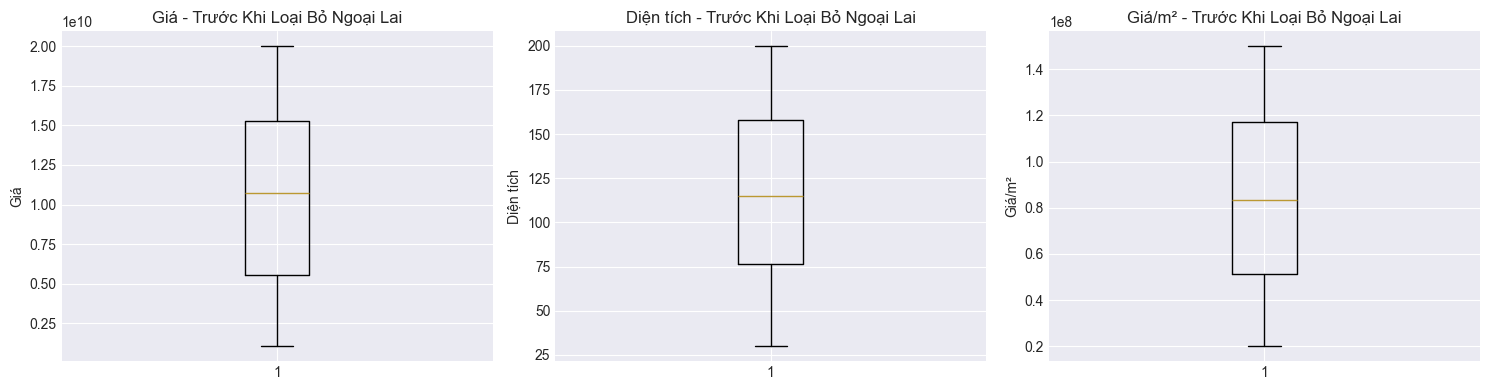

In [14]:
# ============================================================================
# TRỰC QUAN HÓA OUTLIERS (GIÁ TRỊ NGOẠI LAI)
# ============================================================================
# Trước khi loại bỏ outliers, chúng ta visualize để hiểu phân phối dữ liệu

if 'Giá' in preprocessor.df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for idx, col in enumerate(['Giá', 'Diện tích', 'Giá/m²']):
        if col in preprocessor.df.columns:
            # Boxplot hiển thị:
            # - Hộp: Q1 đến Q3 (chứa 50% dữ liệu ở giữa)
            # - Đường ngang trong hộp: Median (Q2)
            # - Whiskers: Kéo dài đến 1.5*IQR từ Q1 và Q3
            # - Điểm nằm ngoài whiskers: Potential outliers
            axes[idx].boxplot(preprocessor.df[col].dropna())
            axes[idx].set_title(f'{col} - Trước Khi Loại Bỏ Ngoại Lai')
            axes[idx].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

In [15]:
# ============================================================================
# THUẬT TOÁN LOẠI BỎ OUTLIERS: IQR (INTERQUARTILE RANGE) METHOD
# ============================================================================
# 
# NGUYÊN LÝ HOẠT ĐỘNG:
# IQR là một phương pháp thống kê robust để phát hiện outliers
# 
# CÔNG THỨC:
# 1. Q1 (Quartile 1) = Percentile thứ 25 của dữ liệu
# 2. Q3 (Quartile 3) = Percentile thứ 75 của dữ liệu  
# 3. IQR = Q3 - Q1 (khoảng giữa 50% dữ liệu ở trung tâm)
# 4. Lower Bound = Q1 - 1.5 × IQR
# 5. Upper Bound = Q3 + 1.5 × IQR
# 6. Outliers = Giá trị nằm ngoài [Lower Bound, Upper Bound]
#
# VÍ DỤ: Nếu giá nhà có Q1=3 tỷ, Q3=7 tỷ:
# - IQR = 7 - 3 = 4 tỷ
# - Lower = 3 - 1.5*4 = -3 tỷ (giới hạn dưới)
# - Upper = 7 + 1.5*4 = 13 tỷ (giới hạn trên)
# - Nhà giá > 13 tỷ sẽ bị coi là outlier
#
# ƯU ĐIỂM:
# - Không phụ thuộc vào giả định phân phối chuẩn (normal distribution)
# - Robust với dữ liệu skewed (lệch)
# - Dễ hiểu và implement
#
# NHƯỢC ĐIỂM:
# - Có thể loại bỏ quá nhiều dữ liệu nếu threshold quá nhỏ
# - Không hiệu quả với multimodal distributions
# ============================================================================

preprocessor.handle_outliers(method='iqr', threshold=1.5)
print(f"Kích thước sau khi loại bỏ ngoại lai: {preprocessor.df.shape}")

Removing outliers using IQR method (threshold=1.5)...
  - Removed 0 outliers from 'Giá'
  - Removed 0 outliers from 'Diện tích'
  - Removed 0 outliers from 'Giá/m²'
✓ Total rows removed: 0
Kích thước sau khi loại bỏ ngoại lai: (1000, 13)


## 5. Trực Quan Hóa Dữ Liệu

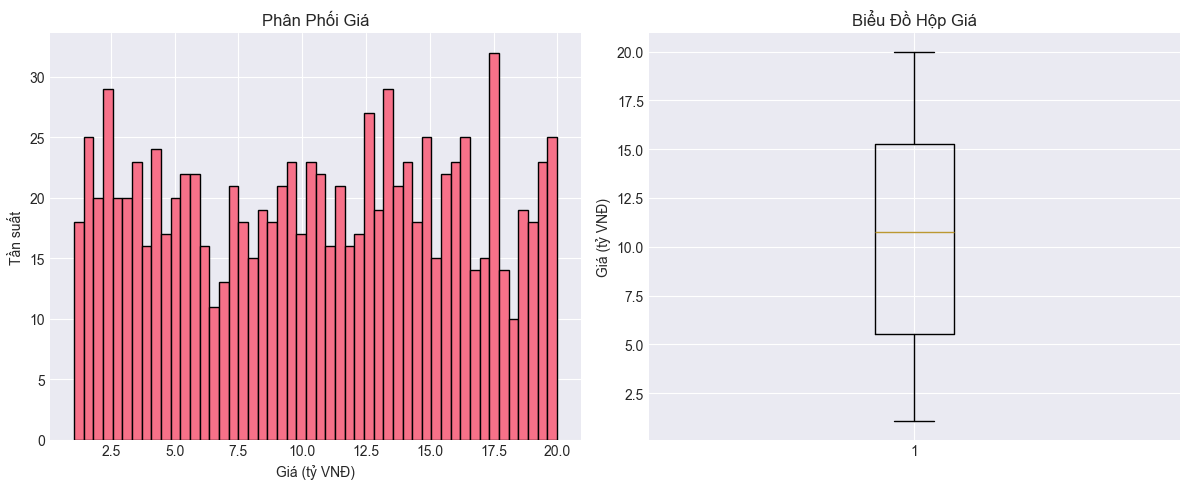

In [16]:
# Phân phối giá
if 'Giá' in preprocessor.df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(preprocessor.df['Giá'] / 1e9, bins=50, edgecolor='black')
    plt.xlabel('Giá (tỷ VNĐ)')
    plt.ylabel('Tần suất')
    plt.title('Phân Phối Giá')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(preprocessor.df['Giá'] / 1e9)
    plt.ylabel('Giá (tỷ VNĐ)')
    plt.title('Biểu Đồ Hộp Giá')
    
    plt.tight_layout()
    plt.show()

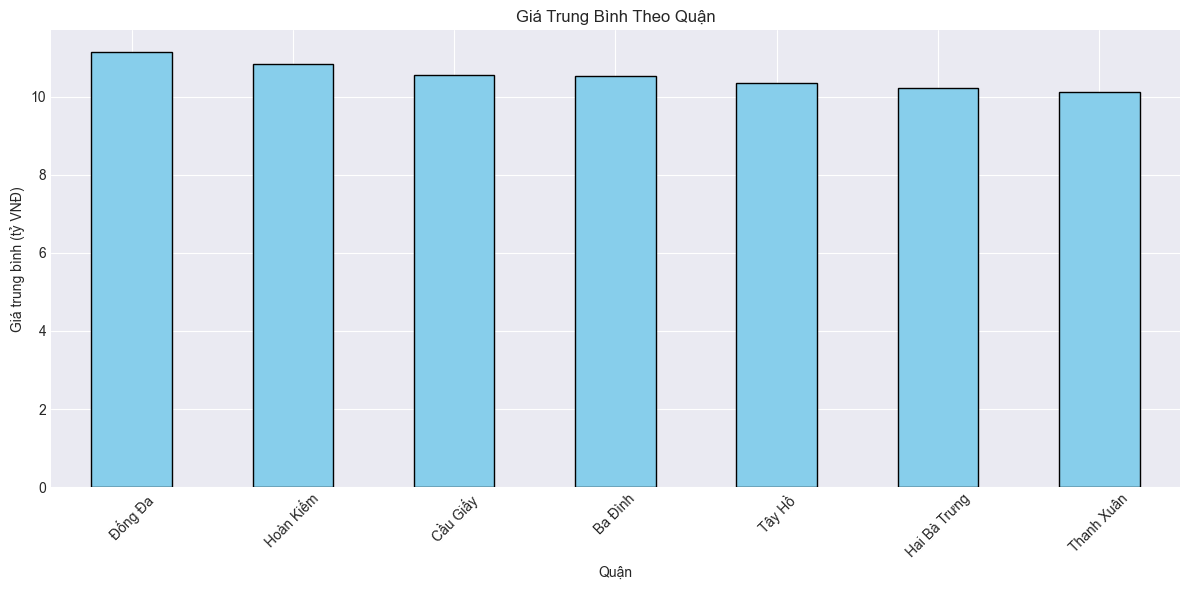

In [17]:
# Giá theo quận
if 'Quận' in preprocessor.df.columns and 'Giá' in preprocessor.df.columns:
    plt.figure(figsize=(12, 6))
    
    district_price = preprocessor.df.groupby('Quận')['Giá'].mean().sort_values(ascending=False) / 1e9
    district_price.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Quận')
    plt.ylabel('Giá trung bình (tỷ VNĐ)')
    plt.title('Giá Trung Bình Theo Quận')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

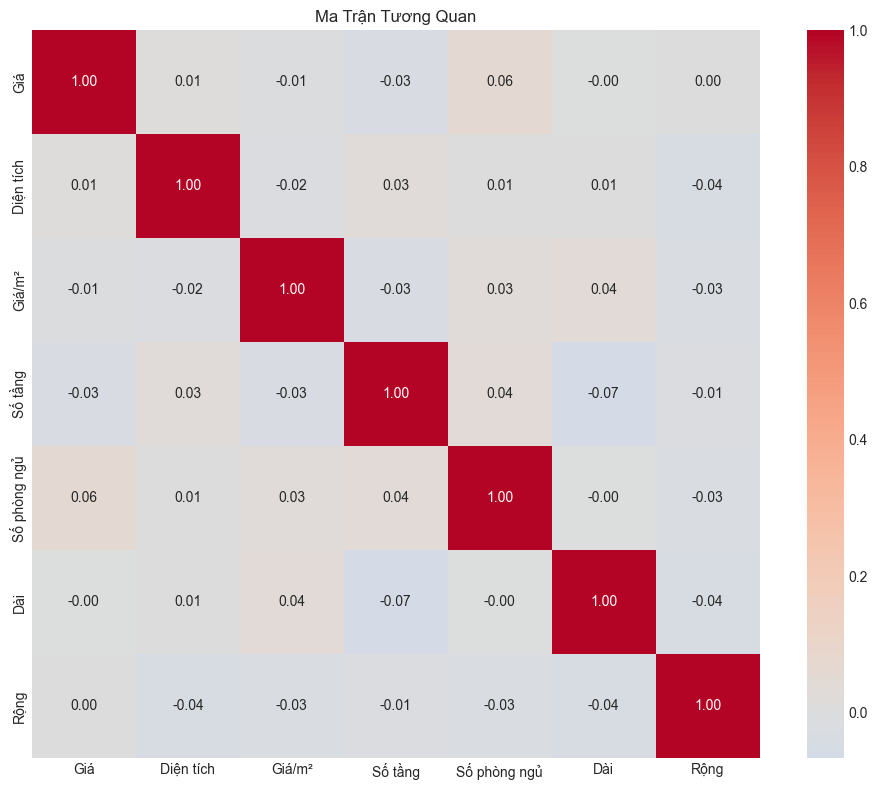

In [18]:
# Ma trận tương quan cho các đặc trưng số
numerical_cols = preprocessor.df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    plt.figure(figsize=(10, 8))
    correlation = preprocessor.df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
    plt.title('Ma Trận Tương Quan')
    plt.tight_layout()
    plt.show()

## 6. Lưu Dữ Liệu Đã Xử Lý

In [19]:
# Lưu dữ liệu đã làm sạch (trước khi mã hóa)
output_path = '../data/processed_housing_data.csv'

preprocessor.df_processed = preprocessor.df.copy()
preprocessor.save_processed_data(output_path)

print(f"\nKích thước dữ liệu cuối cùng: {preprocessor.df_processed.shape}")
print("\nĐã hoàn thành tiền xử lý dữ liệu! ✓")

✓ Processed data saved to: ../data/processed_housing_data.csv

Kích thước dữ liệu cuối cùng: (1000, 13)

Đã hoàn thành tiền xử lý dữ liệu! ✓


## Tổng Kết

Trong notebook này, chúng ta đã:
1. ✓ Tải dữ liệu nhà ở thô
2. ✓ Loại bỏ các cột không cần thiết
3. ✓ Xử lý các bản ghi trùng lặp
4. ✓ Xử lý giá trị thiếu theo quy tắc
5. ✓ Loại bỏ giá trị ngoại lai bằng phương pháp IQR
6. ✓ Trực quan hóa phân phối và mối quan hệ dữ liệu
7. ✓ Lưu dữ liệu đã xử lý để huấn luyện mô hình

**Bước Tiếp Theo**: Sử dụng `02_model_training.ipynb` để huấn luyện và đánh giá các mô hình ML.